In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [57]:
df = pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [58]:
print(df.index)

RangeIndex(start=0, stop=150, step=1)


In [59]:
columns_eda = df.columns[:-1]
columns_eda

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

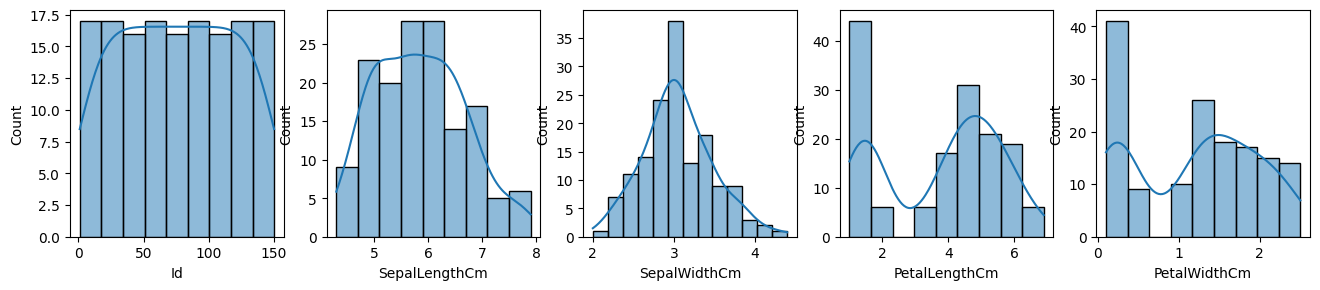

In [60]:
fig = plt.figure(figsize=(16,10))

for i in range(len(columns_eda)):
    colname = columns_eda[i]
    sub = fig.add_subplot(3, 5, i+1)
    sns.histplot(data=df, x=colname, kde=True)

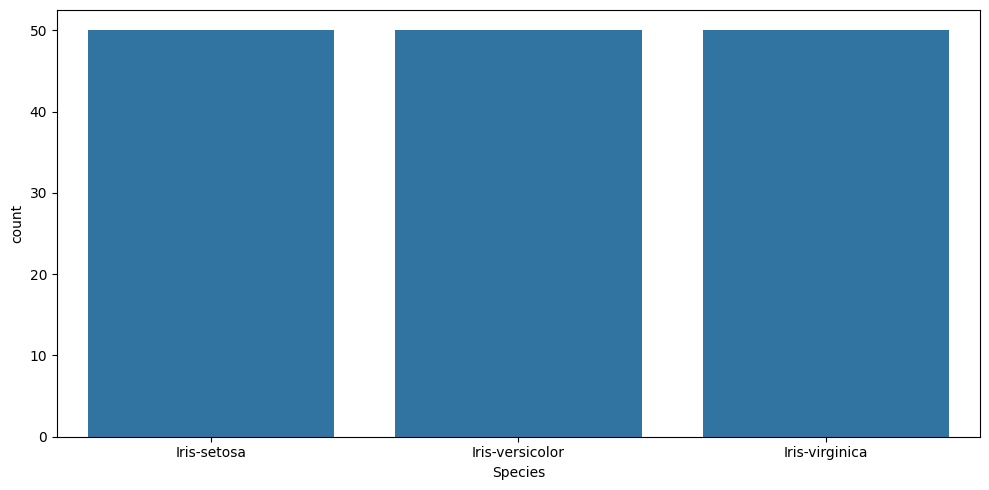

In [61]:
# Tạo một figure với kích thước phù hợp
fig = plt.figure(figsize=(10, 5))

# Vẽ biểu đồ countplot cho cột 'Species'
sns.countplot(data=df, x='Species')

# Hiển thị figure
plt.tight_layout()
plt.show()

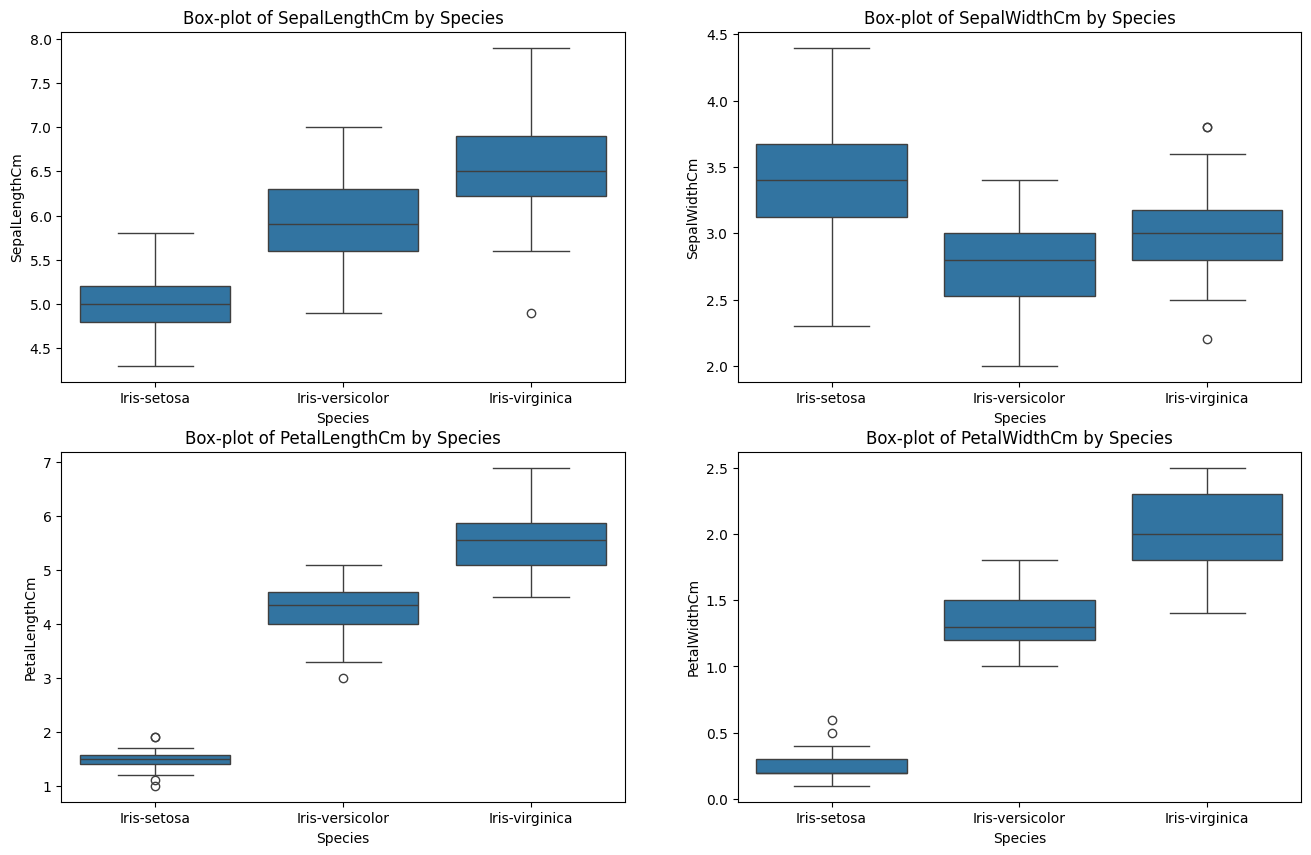

In [62]:
# Danh sách các biến định lượng (input)
input_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Tạo một figure với kích thước phù hợp (4 biến, chia làm 2 hàng và 2 cột)
fig = plt.figure(figsize=(16, 10))

# Vẽ Box-plot cho từng biến định lượng theo biến mục tiêu 'Species'
for i in range(len(input_columns)):
    colname = input_columns[i]
    sub = fig.add_subplot(2, 2, i+1)  # Chia figure thành 2 hàng và 2 cột
    sns.boxplot(data=df, x='Species', y=colname, ax=sub)  # Vẽ box-plot
    sub.set_title(f'Box-plot of {colname} by Species')

In [63]:
# Tách các cột đầu vào (X) và cột mục tiêu (y)
X = df.iloc[:,:-1].values
y = df[['Species']].values


NameError: name 'df' is not defined

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
print("Index của các mẫu trong tập X_train:")
print(X_train)

Index của các mẫu trong tập X_train:
[[2.30e+01 4.60e+00 3.60e+00 1.00e+00 2.00e-01]
 [1.60e+01 5.70e+00 4.40e+00 1.50e+00 4.00e-01]
 [6.60e+01 6.70e+00 3.10e+00 4.40e+00 1.40e+00]
 [1.20e+01 4.80e+00 3.40e+00 1.60e+00 2.00e-01]
 [4.30e+01 4.40e+00 3.20e+00 1.30e+00 2.00e-01]
 [1.47e+02 6.30e+00 2.50e+00 5.00e+00 1.90e+00]
 [5.20e+01 6.40e+00 3.20e+00 4.50e+00 1.50e+00]
 [2.80e+01 5.20e+00 3.50e+00 1.50e+00 2.00e-01]
 [5.00e+00 5.00e+00 3.60e+00 1.40e+00 2.00e-01]
 [3.30e+01 5.20e+00 4.10e+00 1.50e+00 1.00e-01]
 [1.43e+02 5.80e+00 2.70e+00 5.10e+00 1.90e+00]
 [8.60e+01 6.00e+00 3.40e+00 4.50e+00 1.60e+00]
 [8.70e+01 6.70e+00 3.10e+00 4.70e+00 1.50e+00]
 [1.70e+01 5.40e+00 3.90e+00 1.30e+00 4.00e-01]
 [1.10e+01 5.40e+00 3.70e+00 1.50e+00 2.00e-01]
 [8.20e+01 5.50e+00 2.40e+00 3.70e+00 1.00e+00]
 [1.34e+02 6.30e+00 2.80e+00 5.10e+00 1.50e+00]
 [1.38e+02 6.40e+00 3.10e+00 5.50e+00 1.80e+00]
 [7.60e+01 6.60e+00 3.00e+00 4.40e+00 1.40e+00]
 [1.10e+02 7.20e+00 3.60e+00 6.10e+00 2.50e+00]
 [9

In [66]:
print("Index của các mẫu trong tập X_test:")
print(X_test)

Index của các mẫu trong tập X_test:
[[7.40e+01 6.10e+00 2.80e+00 4.70e+00 1.20e+00]
 [1.90e+01 5.70e+00 3.80e+00 1.70e+00 3.00e-01]
 [1.19e+02 7.70e+00 2.60e+00 6.90e+00 2.30e+00]
 [7.90e+01 6.00e+00 2.90e+00 4.50e+00 1.50e+00]
 [7.70e+01 6.80e+00 2.80e+00 4.80e+00 1.40e+00]
 [3.20e+01 5.40e+00 3.40e+00 1.50e+00 4.00e-01]
 [6.50e+01 5.60e+00 2.90e+00 3.60e+00 1.30e+00]
 [1.42e+02 6.90e+00 3.10e+00 5.10e+00 2.30e+00]
 [6.90e+01 6.20e+00 2.20e+00 4.50e+00 1.50e+00]
 [8.30e+01 5.80e+00 2.70e+00 3.90e+00 1.20e+00]
 [1.11e+02 6.50e+00 3.20e+00 5.10e+00 2.00e+00]
 [1.30e+01 4.80e+00 3.00e+00 1.40e+00 1.00e-01]
 [3.70e+01 5.50e+00 3.50e+00 1.30e+00 2.00e-01]
 [1.00e+01 4.90e+00 3.10e+00 1.50e+00 1.00e-01]
 [2.00e+01 5.10e+00 3.80e+00 1.50e+00 3.00e-01]
 [5.70e+01 6.30e+00 3.30e+00 4.70e+00 1.60e+00]
 [1.05e+02 6.50e+00 3.00e+00 5.80e+00 2.20e+00]
 [7.00e+01 5.60e+00 2.50e+00 3.90e+00 1.10e+00]
 [5.60e+01 5.70e+00 2.80e+00 4.50e+00 1.30e+00]
 [1.33e+02 6.40e+00 2.80e+00 5.60e+00 2.20e+00]
 [3.

In [67]:
knn = KNeighborsClassifier(n_neighbors=8, algorithm="ball_tree")
knn.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8)

In [68]:
knn.score(X_train, y_train)

0.9916666666666667

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: 

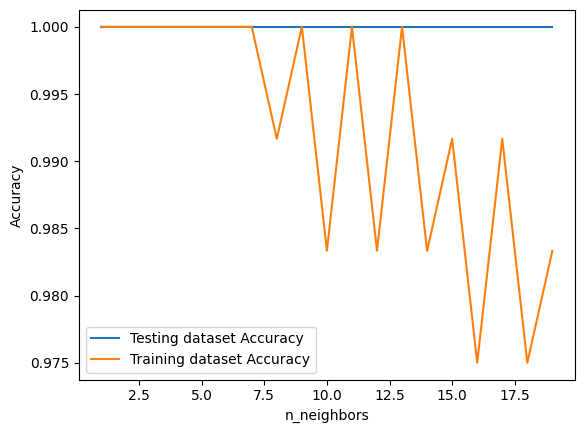

In [69]:
import numpy as np
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy')
plt.show()

In [70]:
# Tìm giá trị K tốt nhất (giá trị K có độ chính xác trên tập test cao nhất)
knn_best = neighbors[np.argmax(test_accuracy)]
print(f"Giá trị K tốt nhất là: {knn_best}")

Giá trị K tốt nhất là: 1


In [71]:
# Xây dựng lại mô hình K-NN với K tốt nhất
knn_best = KNeighborsClassifier(n_neighbors=knn_best, algorithm="ball_tree")
knn_best.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

In [72]:
distances, indices = knn_best.kneighbors(X_test)

# In ra khoảng cách và các hàng xóm cho từng mẫu trong tập kiểm tra
for i in range(len(X_test)):
    print(f"Mẫu test {i+1}:")
    print(f"  Khoảng cách đến các hàng: {distances[i]}")
    print(f"  Chỉ số của các hàng trong tập huấn luyện: {indices[i]}")
    print()

Mẫu test 1:
  Khoảng cách đến các hàng: [1.12249722]
  Chỉ số của các hàng trong tập huấn luyện: [73]

Mẫu test 2:
  Khoảng cách đến các hàng: [1.24096736]
  Chỉ số của các hàng trong tập huấn luyện: [71]

Mẫu test 3:
  Khoảng cách đến các hàng: [1.57797338]
  Chỉ số của các hàng trong tập huấn luyện: [37]

Mẫu test 4:
  Khoảng cách đến các hàng: [1.33790882]
  Chỉ số của các hàng trong tập huấn luyện: [54]

Mẫu test 5:
  Khoảng cách đến các hàng: [1.08627805]
  Chỉ số của các hàng trong tập huấn luyện: [54]

Mẫu test 6:
  Khoảng cách đến các hàng: [1.27279221]
  Chỉ số của các hàng trong tập huấn luyện: [9]

Mẫu test 7:
  Khoảng cách đến các hàng: [1.57162336]
  Chỉ số của các hàng trong tập huấn luyện: [79]

Mẫu test 8:
  Khoảng cách đến các hàng: [1.14017543]
  Chỉ số của các hàng trong tập huấn luyện: [103]

Mẫu test 9:
  Khoảng cách đến các hàng: [1.34907376]
  Chỉ số của các hàng trong tập huấn luyện: [25]

Mẫu test 10:
  Khoảng cách đến các hàng: [1.12249722]
  Chỉ số của các hà

In [73]:
# Lấy khoảng cách và hàng xóm của mẫu đầu tiên trong tập test
distances_first_sample, indices_first_sample = knn_best.kneighbors([X_test[0]])

# In ra kết quả
print(f"Mẫu test đầu tiên gần với các hàng ở tập train theo index: {indices_first_sample[0]}")
print(f"Khoảng cách tương ứng theo Euclidean: {distances_first_sample[0]}")

Mẫu test đầu tiên gần với các hàng ở tập train theo index: [73]
Khoảng cách tương ứng theo Euclidean: [1.12249722]


In [74]:
# Dự đoán nhãn cho các mẫu dữ liệu trong tập test
y_test_predicted = knn_best.predict(X_test)

# In danh sách các nhãn dự báo
print("Danh sách các nhãn dự báo cho các mẫu dữ liệu trong tập test:")
print(y_test_predicted)

# Kết quả dự báo của mẫu input thứ 5
predicted_label_fifth_sample = y_test_predicted[4]  # Chỉ số 4 cho mẫu thứ 5 (chỉ số bắt đầu từ 0)
print(f"Kết quả dự báo của mẫu input thứ 5 trong tập test: {predicted_label_fifth_sample}")

Danh sách các nhãn dự báo cho các mẫu dữ liệu trong tập test:
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']
Kết quả dự báo của mẫu input thứ 5 trong tập test: Iris-versicolor


In [75]:
#9)
# Xem các giá trị duy nhất trong cột target
unique_targets = df['Species'].unique()

print("Danh sách các giá trị của lớp đánh nhãn (Species):")
print(unique_targets)

Danh sách các giá trị của lớp đánh nhãn (Species):
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [76]:
cfmx = confusion_matrix(y_test, y_test_predicted)
cfmx

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



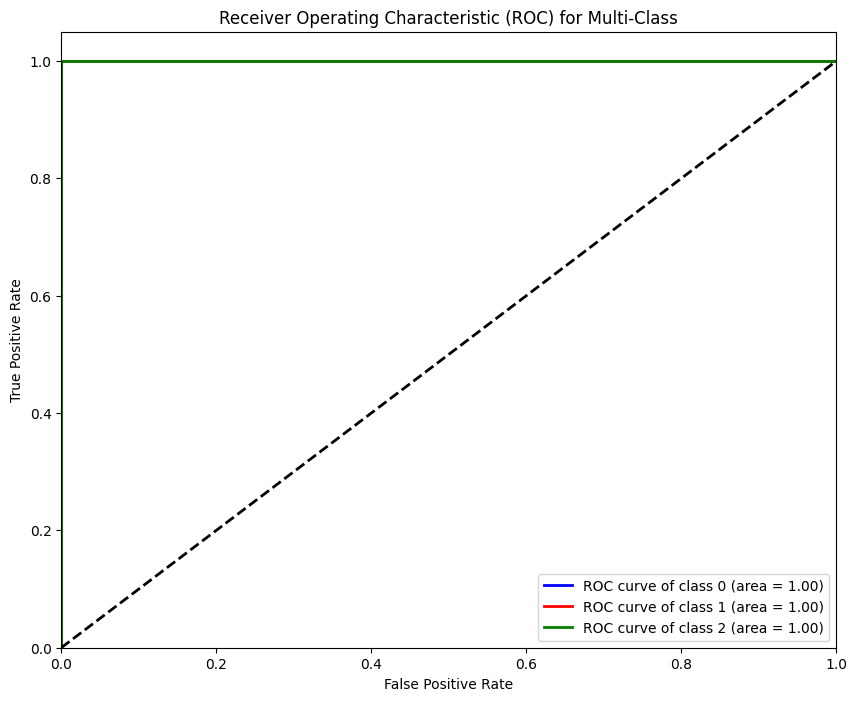

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Tách các cột đầu vào (X) và cột mục tiêu (y)
X = df.iloc[:, 1:-1].values  # Lấy các cột đầu vào từ 'SepalLengthCm' đến 'PetalWidthCm'
y = df['Species'].values     # Lấy cột 'Species' làm biến mục tiêu

# Chuyển đổi biến mục tiêu (Species) từ dạng chuỗi thành số
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Chuẩn bị dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Chuyển y_test và y_train thành One-vs-Rest (đa lớp thành nhị phân)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Dự đoán xác suất cho mỗi lớp
y_score = model.predict_proba(X_test)

# Vẽ biểu đồ ROC cho mỗi lớp
fpr = dict()
tpr = dict()
roc_auc = dict()

# Tính toán ROC cho mỗi lớp
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Vẽ đồ thị ROC cho mỗi lớp
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class')
plt.legend(loc="lower right")
plt.show()
